In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = 'Resources/diabetes_data.csv'
df = pd.read_csv(file_path)
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Importance

In [4]:
# Feature Importance
# What features are considered important?
# guided by https://betterdatascience.com/feature-importance-python/


from sklearn.linear_model import LogisticRegression

mdl = LogisticRegression().fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': mdl.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

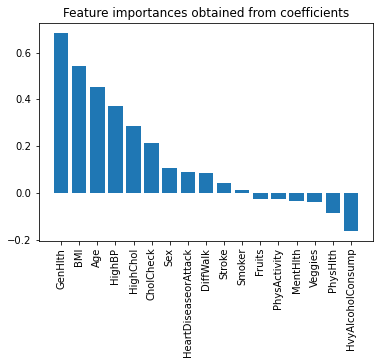

In [5]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients')
plt.xticks(rotation='vertical')
plt.show()

According to the data, GenHlth, BMI, Age, HighBP, and CholCheck are the features that have a bigger affect on the outcome of predicting diabetes in a patient.

Interestingly, heavy alcholol consumption has a negative correlation to predicting diabetes.

In [14]:
# extracting important features
# Would leaving in PhysHealth, and HvyAlcoholConsump help our model train?
# Because if we leave it in there it would tell the model something along the lines of
# "if it has this feature, they probably don't."
unimportant_features_df = df[['Fruits','MentHlth','PhysActivity','Veggies','PhysHlth','HvyAlcoholConsump']]
important_features_df = df[['GenHlth', 'BMI', 'Age', 'HighBP', 'HighChol', 'CholCheck', 'Sex', 'HeartDiseaseorAttack', 'DiffWalk', 'Stroke']]